# fbprophet

In [6]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet
import utils
import matplotlib
import matplotlib.pyplot as plt
from fbprophet.diagnostics import cross_validation

%matplotlib inline

def rmsle(y_pred, targ):
    log_vars = np.log(targ + 1) - np.log(y_pred + 1)
    return np.sqrt(np.square(log_vars).mean())

In [7]:
trn = pd.read_csv('./data/air_visit_data.csv')
trn = trn.rename({
    'visit_date': 'ds',
    'visitors': 'y'
}, axis='columns')
trn['y'] = np.log(trn.y)
trn.head()

,air_store_id,ds,y
0,air_ba937bf13d40fb24,2016-01-13,3.218876
1,air_ba937bf13d40fb24,2016-01-14,3.465736
2,air_ba937bf13d40fb24,2016-01-15,3.367296
3,air_ba937bf13d40fb24,2016-01-16,3.091042
4,air_ba937bf13d40fb24,2016-01-18,1.791759


In [8]:
hol = pd.read_csv('./data/date_info.csv')
hol = hol.rename(
    {
        'calendar_date': 'Date',
    }, axis='columns')
hol.Date = pd.to_datetime(hol.Date)
hol = utils.add_ts_elapsed('holiday_flg', ['dur_'], hol)
calender = hol[['Date', 'holiday_flg', 'dur_holiday_flg']]
prophit_hol = calender[calender.holiday_flg == 1].rename({
    'dur_holiday_flg': 'holiday',
    'Date': 'ds'
},axis="columns").drop('holiday_flg', axis=1)
prophit_hol.holiday = prophit_hol.holiday.astype('str')

# Batch Train

In [296]:
result = pd.DataFrame()
stores = trn.groupby('air_store_id')
for i, store in stores:
    storeid = list(store.air_store_id.unique())[0]
#     print(store_df)
    print(str(count) + ' trainging :' + storeid)
    store = store.drop(columns=['air_store_id'])
    m = Prophet(holidays=prophit_hol, yearly_seasonality=False, daily_seasonality=False)
    m.fit(store)
    print(str(count) + 'predicting :' + storeid)
    forecast = m.predict(test_time_df)
    forecast['air_store_id'] = storeid
    forecast = forecast.rename({
        'ds':'visit_date',
        'yhat': 'visitors'
    }, axis='columns')
    forecast['visitors'] = np.exp(forecast.visitors) - 1
    count = count + 1
    result = result.append(forecast)

17 trainging :air_00a91d42b08b08d9
17predicting :air_00a91d42b08b08d9
18 trainging :air_0164b9927d20bcc3
18predicting :air_0164b9927d20bcc3
19 trainging :air_0241aa3964b7f861
19predicting :air_0241aa3964b7f861
20 trainging :air_0328696196e46f18
20predicting :air_0328696196e46f18
21 trainging :air_034a3d5b40d5b1b1
21predicting :air_034a3d5b40d5b1b1
22 trainging :air_036d4f1ee7285390
22predicting :air_036d4f1ee7285390
23 trainging :air_0382c794b73b51ad
23predicting :air_0382c794b73b51ad
24 trainging :air_03963426c9312048
24predicting :air_03963426c9312048
25 trainging :air_04341b588bde96cd
25predicting :air_04341b588bde96cd
26 trainging :air_049f6d5b402a31b2
26predicting :air_049f6d5b402a31b2
27 trainging :air_04cae7c1bc9b2a0b
27predicting :air_04cae7c1bc9b2a0b
28 trainging :air_0585011fa179bcce
28predicting :air_0585011fa179bcce
29 trainging :air_05c325d315cc17f5
29predicting :air_05c325d315cc17f5
30 trainging :air_0647f17b4dc041c8
30predicting :air_0647f17b4dc041c8
31 trainging :air_06

134 trainging :air_290e7a57b390f78e
134predicting :air_290e7a57b390f78e
135 trainging :air_298513175efdf261
135predicting :air_298513175efdf261
136 trainging :air_2a184c1745274b2b
136predicting :air_2a184c1745274b2b
137 trainging :air_2a24aec099333f39
137predicting :air_2a24aec099333f39
138 trainging :air_2a3743e37aab04b4
138predicting :air_2a3743e37aab04b4
139 trainging :air_2a485b92210c98b5
139predicting :air_2a485b92210c98b5
140 trainging :air_2a7f14da7fe0f699
140predicting :air_2a7f14da7fe0f699
141 trainging :air_2aab19554f91ff82
141predicting :air_2aab19554f91ff82
142 trainging :air_2ac361b97630e2df
142predicting :air_2ac361b97630e2df
143 trainging :air_2b8b29ddfd35018e
143predicting :air_2b8b29ddfd35018e
144 trainging :air_2b9bc9f5f5168ea1
144predicting :air_2b9bc9f5f5168ea1
145 trainging :air_2bffb19a24d11729
145predicting :air_2bffb19a24d11729
146 trainging :air_2c505f9ad67d4635
146predicting :air_2c505f9ad67d4635
147 trainging :air_2c6c79d597e48096
147predicting :air_2c6c79d59

248 trainging :air_4cab91146e3d1897
248predicting :air_4cab91146e3d1897
249 trainging :air_4cca5666eaf5c709
249predicting :air_4cca5666eaf5c709
250 trainging :air_4ce7b17062a1bf73
250predicting :air_4ce7b17062a1bf73
251 trainging :air_4d21676ed11f0bac
251predicting :air_4d21676ed11f0bac
252 trainging :air_4d71826793c09b22
252predicting :air_4d71826793c09b22
253 trainging :air_4d90a22572fa1ec9
253predicting :air_4d90a22572fa1ec9
254 trainging :air_4de6d887a7b1c1fc
254predicting :air_4de6d887a7b1c1fc
255 trainging :air_4dea8d17f6f59c56
255predicting :air_4dea8d17f6f59c56
256 trainging :air_4e1c38f68f435596
256predicting :air_4e1c38f68f435596
257 trainging :air_4f762e840b3996e1
257predicting :air_4f762e840b3996e1
258 trainging :air_4feeb8600f131e43
258predicting :air_4feeb8600f131e43
259 trainging :air_500641aca4cf673c
259predicting :air_500641aca4cf673c
260 trainging :air_506fe758114df773
260predicting :air_506fe758114df773
261 trainging :air_51281cd059d7b89b
261predicting :air_51281cd05

362 trainging :air_6ca1d941c8199a67
362predicting :air_6ca1d941c8199a67
363 trainging :air_6cbe54f0aa30b615
363predicting :air_6cbe54f0aa30b615
364 trainging :air_6ced51c24fb54262
364predicting :air_6ced51c24fb54262
365 trainging :air_6d64dba2edd4fc0c
365predicting :air_6d64dba2edd4fc0c
366 trainging :air_6d65542aa43b598b
366predicting :air_6d65542aa43b598b
367 trainging :air_6d65dd11d96e00fb
367predicting :air_6d65dd11d96e00fb
368 trainging :air_6e06824d0934dd81
368predicting :air_6e06824d0934dd81
369 trainging :air_6e3fd96320d24324
369predicting :air_6e3fd96320d24324
370 trainging :air_6e64fb5821402cd2
370predicting :air_6e64fb5821402cd2
371 trainging :air_6ff5fca957798daa
371predicting :air_6ff5fca957798daa
372 trainging :air_707d4b6328f2c2df
372predicting :air_707d4b6328f2c2df
373 trainging :air_709262d948dd0b6e
373predicting :air_709262d948dd0b6e
374 trainging :air_70e9e8cd55879414
374predicting :air_70e9e8cd55879414
375 trainging :air_70f834596eb99fee
375predicting :air_70f834596

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


470 trainging :air_900d755ebd2f7bbd
470predicting :air_900d755ebd2f7bbd
471 trainging :air_901925b628677c2e
471predicting :air_901925b628677c2e
472 trainging :air_90213bcae4afa274
472predicting :air_90213bcae4afa274
473 trainging :air_90bd5de52c166767
473predicting :air_90bd5de52c166767
474 trainging :air_90ed0a2f24755533
474predicting :air_90ed0a2f24755533
475 trainging :air_90f0efbb702d77b7
475predicting :air_90f0efbb702d77b7
476 trainging :air_9105a29b0eb250d2
476predicting :air_9105a29b0eb250d2
477 trainging :air_91236b89d29567af
477predicting :air_91236b89d29567af
478 trainging :air_9152d9926e5c4a3a
478predicting :air_9152d9926e5c4a3a
479 trainging :air_915558a55c2bc56c
479predicting :air_915558a55c2bc56c
480 trainging :air_91beafbba9382b0a
480predicting :air_91beafbba9382b0a
481 trainging :air_91d72e16c4bcba55
481predicting :air_91d72e16c4bcba55
482 trainging :air_9241121af22ff1d6
482predicting :air_9241121af22ff1d6
483 trainging :air_929d8513e3cdb423
483predicting :air_929d8513e

584 trainging :air_aed3a8b49abe4a48
584predicting :air_aed3a8b49abe4a48
585 trainging :air_af03c277a167b2bd
585predicting :air_af03c277a167b2bd
586 trainging :air_af24e3e817dea1e5
586predicting :air_af24e3e817dea1e5
587 trainging :air_af63df35857b16e6
587predicting :air_af63df35857b16e6
588 trainging :air_b0a6a4c5e95c74cf
588predicting :air_b0a6a4c5e95c74cf
589 trainging :air_b162fb07fbbdea33
589predicting :air_b162fb07fbbdea33
590 trainging :air_b192fb5310436005
590predicting :air_b192fb5310436005
591 trainging :air_b1a72bf1ebf4b8ef
591predicting :air_b1a72bf1ebf4b8ef
592 trainging :air_b1bb1fae86617d7a
592predicting :air_b1bb1fae86617d7a
593 trainging :air_b1d822f75c9fc615
593predicting :air_b1d822f75c9fc615
594 trainging :air_b2395df0e874078d
594predicting :air_b2395df0e874078d
595 trainging :air_b23d0f519291247d
595predicting :air_b23d0f519291247d
596 trainging :air_b259b4e4a51a690d
596predicting :air_b259b4e4a51a690d
597 trainging :air_b28bed4b2e7167b7
597predicting :air_b28bed4b2

698 trainging :air_d00a15343325e5f7
698predicting :air_d00a15343325e5f7
699 trainging :air_d07e57b21109304a
699predicting :air_d07e57b21109304a
700 trainging :air_d0a1e69685259c92
700predicting :air_d0a1e69685259c92
701 trainging :air_d0a7bd3339c3d12a
701predicting :air_d0a7bd3339c3d12a
702 trainging :air_d0e8a085d8dc83aa
702predicting :air_d0e8a085d8dc83aa
703 trainging :air_d138b593ebda55cc
703predicting :air_d138b593ebda55cc
704 trainging :air_d1418d6fd6d634f2
704predicting :air_d1418d6fd6d634f2
705 trainging :air_d186b2cb0b9ce022
705predicting :air_d186b2cb0b9ce022
706 trainging :air_d1f20424f76cc78e
706predicting :air_d1f20424f76cc78e
707 trainging :air_d34c0861a2be94cb
707predicting :air_d34c0861a2be94cb
708 trainging :air_d3e7b5952cd09ccb
708predicting :air_d3e7b5952cd09ccb
709 trainging :air_d44d210d2994f01b
709predicting :air_d44d210d2994f01b
710 trainging :air_d473620754bf9fc2
710predicting :air_d473620754bf9fc2
711 trainging :air_d477b6339b8ce69f
711predicting :air_d477b6339

812 trainging :air_f3f9824b7d70c3cf
812predicting :air_f3f9824b7d70c3cf
813 trainging :air_f4936b91c9addbf0
813predicting :air_f4936b91c9addbf0
814 trainging :air_f593fa60ac3541e2
814predicting :air_f593fa60ac3541e2
815 trainging :air_f690c42545146e0a
815predicting :air_f690c42545146e0a
816 trainging :air_f6b2489ccf873c3b
816predicting :air_f6b2489ccf873c3b
817 trainging :air_f6bfd27e2e174d16
817predicting :air_f6bfd27e2e174d16
818 trainging :air_f6cdaf7b7fdc6d78
818predicting :air_f6cdaf7b7fdc6d78
819 trainging :air_f8233ad00755c35c
819predicting :air_f8233ad00755c35c
820 trainging :air_f85e21e543cf44f2
820predicting :air_f85e21e543cf44f2
821 trainging :air_f88898cd09f40496
821predicting :air_f88898cd09f40496
822 trainging :air_f911308e19d64236
822predicting :air_f911308e19d64236
823 trainging :air_f9168b23fdfc1e52
823predicting :air_f9168b23fdfc1e52
824 trainging :air_f927b2da69a82341
824predicting :air_f927b2da69a82341
825 trainging :air_f957c6d6467d4d90
825predicting :air_f957c6d64

In [297]:
result.to_csv('./result/pp_result_2.csv')

In [298]:
result['visit_date'] = result['visit_date'].astype('str')

In [299]:
def trn2test(tes_in_trn):
    tes_in_trn['id'] = tes_in_trn[['air_store_id', 'visit_date']].apply(
        lambda x: '_'.join(x), axis=1)
    return tes_in_trn[['id', 'visitors']]

In [300]:
fr = trn2test(result[['air_store_id', 'visit_date', 'visitors']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [327]:
fr.to_csv('./result/pp_submission.csv', index=False)

In [356]:
final_result = pd.merge(test.drop(columns=['visitors']), fr, how='left')

In [366]:
final_result.to_csv('./result/pp_submission.csv', index=False)

In [365]:
final_result.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2.713417
1,air_00a91d42b08b08d9_2017-04-24,22.902539
2,air_00a91d42b08b08d9_2017-04-25,24.945218
3,air_00a91d42b08b08d9_2017-04-26,30.442141
4,air_00a91d42b08b08d9_2017-04-27,32.736847


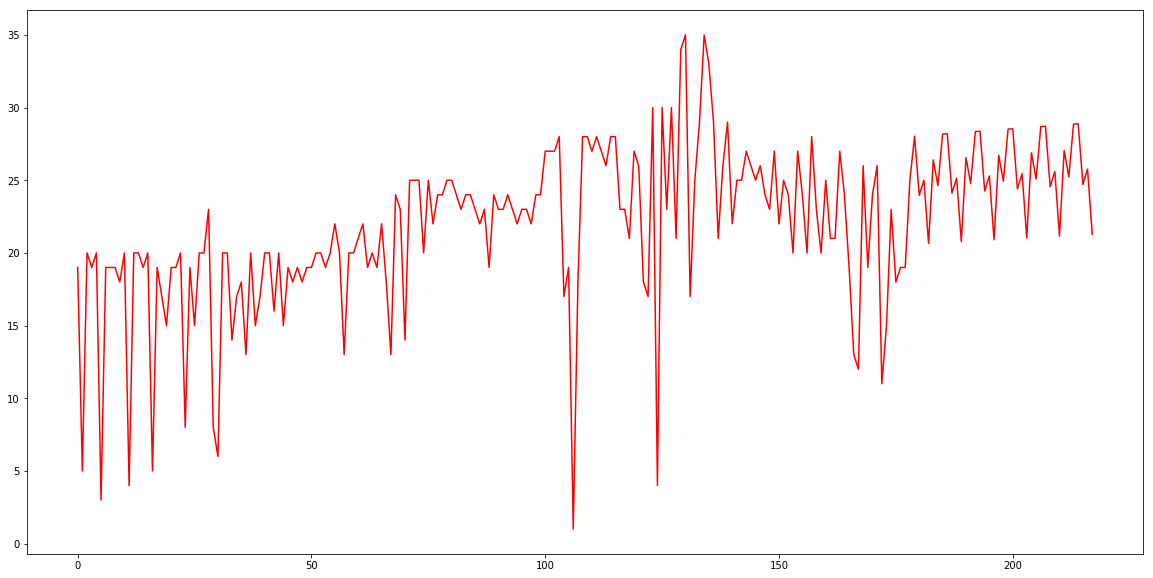

In [326]:
store_id = 'air_47beaffd3806c979'
store1 = data[data.air_store_id == store_id]
store1 = store1.drop(columns=['air_store_id'])
store1_predict = result[result.air_store_id == store_id]
# store1_predict.head()
store1.head()
total = pd.concat([store1.visitors, store1_predict.visitors])
plt.figure(figsize=(20, 10))
plt.plot(total.values, 'r')

# Tuning

In [589]:
# 3-12, 4-22

In [10]:
data = pd.read_csv('./data/air_visit_data.csv')
data = data.rename({
    'visit_date': 'ds',
    'visitors': 'y'
}, axis='columns')
data['y'] = np.log(data.y)
stores = data.air_store_id.unique()
hol = pd.read_csv('./data/date_info.csv')
hol = hol.rename(
    {
        'calendar_date': 'Date',
    }, axis='columns')
hol.Date = pd.to_datetime(hol.Date)
hol = utils.add_ts_elapsed('holiday_flg', ['dur_'], hol)
calender = hol[['Date', 'holiday_flg', 'dur_holiday_flg']]
prophit_hol = calender[calender.holiday_flg == 1].rename({
    'dur_holiday_flg': 'holiday',
    'Date': 'ds'
},axis="columns").drop('holiday_flg', axis=1)
prophit_hol.holiday = prophit_hol.holiday.astype('str')

In [11]:
def countData(df):
    return len(df)
gdata = data.groupby('air_store_id').apply(countData)
gdata = gdata.reset_index()

In [12]:
gdata = gdata.rename({
    0: 'data_count'
}, axis='columns')
gdata.head()

,air_store_id,data_count
0,air_00a91d42b08b08d9,232
1,air_0164b9927d20bcc3,149
2,air_0241aa3964b7f861,396
3,air_0328696196e46f18,116
4,air_034a3d5b40d5b1b1,251


In [18]:
data = pd.merge(data, gdata, how='left')

In [20]:
# trn_set = data
trn_set = data[data.ds < '2017-03-12']
valid_set = data[data.ds >= '2017-03-12']
len(trn_set), len(valid_set)

(222073, 30035)

In [13]:
def testAStore(demo_store_id):
    trn = trn_set[trn_set.air_store_id == demo_store_id].copy()
    data_count = trn.data_count.unique()[0]
    dl = len(trn)
    trn_len = int(np.floor(dl * 0.9))
    trn_data = trn[ :trn_len]
    valid_data = trn[trn_len: ]
    m0 = Prophet(holidays=prophit_hol, 
                yearly_seasonality=False,
                daily_seasonality=False,
                weekly_seasonality=True)

#     m1 = Prophet(holidays=prophit_hol, 
#                 yearly_seasonality=True,
#                 daily_seasonality=False,
#                 weekly_seasonality=True)
    
    m0.fit(trn)
#     m1.fit(trn)
#     if (data_count >= 200):
#         df_cv0 = cross_validation(m0, horizon = '40 days')
#         df_cv1 = cross_validation(m1, horizon = '40 days')
#         loss0 = rmsle(np.exp(df_cv0.yhat.values), np.exp(df_cv0.y.values))
#         loss1 = rmsle(np.exp(df_cv1.yhat.values), np.exp(df_cv1.y.values))
#     elif (data_count >= 60) :
    forecast0 = m0.predict(valid_data)
    forecast1 = m0.predict(trn_data)
    loss0 = rmsle(np.exp(forecast0.yhat.values), np.exp(valid_data.y.values))
    loss1 = rmsle(np.exp(forecast1.yhat.values), np.exp(trn_data.y.values))
#     loss1 = rmsle(np.exp(forecast1.yhat.values), np.exp(trn.y.values))
#     else:
#         loss0 = -1
#         loss1 = -1 
    
    return {
        'aire_store_id': demo_store_id, 
        'train_loss': loss1,
        'valid_loss': loss0, 
        'valid_len': dl - trn_len,
#         'cv_loss1': loss1,
        'data_count': data_count
    }

In [21]:
res = testAStore('air_23e1b11aee2a1407')

In [1662]:
res

{'aire_store_id': 'air_b30fffd7ab1e75a5',
 'data_count': 202,
 'train_loss': 0.33940005910608251,
 'valid_len': 21,
 'valid_loss': 0.24238757307924863}

In [1663]:
## pridect mul
result = {}
from multiprocessing import Pool
concurrency = 3
step_task = 1
num_tasks = len(stores)
with Pool(concurrency) as pool:
    for i, res in enumerate(pool.imap(testAStore, stores), 1):
        result[i] = res
        if i % step_task == 0:
            print("progress={} %".format(i/num_tasks*100))

progress=0.12062726176115801 %
progress=0.24125452352231602 %
progress=0.3618817852834741 %
progress=0.48250904704463204 %
progress=0.6031363088057901 %
progress=0.7237635705669482 %
progress=0.8443908323281062 %
progress=0.9650180940892641 %
progress=1.0856453558504222 %
progress=1.2062726176115801 %
progress=1.3268998793727382 %
progress=1.4475271411338964 %
progress=1.5681544028950543 %
progress=1.6887816646562124 %
progress=1.8094089264173705 %
progress=1.9300361881785282 %
progress=2.0506634499396865 %
progress=2.1712907117008444 %
progress=2.2919179734620023 %
progress=2.4125452352231602 %
progress=2.5331724969843186 %
progress=2.6537997587454765 %
progress=2.7744270205066344 %
progress=2.8950542822677927 %
progress=3.0156815440289506 %
progress=3.1363088057901085 %
progress=3.2569360675512664 %
progress=3.3775633293124248 %
progress=3.4981905910735827 %
progress=3.618817852834741 %
progress=3.739445114595899 %
progress=3.8600723763570564 %
progress=3.9806996381182147 %
progress=

progress=33.65500603136309 %
progress=33.775633293124244 %
progress=33.8962605548854 %
progress=34.016887816646566 %
progress=34.13751507840772 %
progress=34.25814234016888 %
progress=34.37876960193004 %
progress=34.499396863691196 %
progress=34.62002412545235 %
progress=34.74065138721351 %
progress=34.86127864897467 %
progress=34.981905910735826 %
progress=35.10253317249698 %
progress=35.22316043425814 %
progress=35.343787696019305 %
progress=35.46441495778046 %
progress=35.58504221954162 %
progress=35.70566948130278 %
progress=35.826296743063935 %
progress=35.94692400482509 %
progress=36.06755126658625 %
progress=36.18817852834741 %
progress=36.308805790108565 %
progress=36.42943305186972 %
progress=36.55006031363088 %
progress=36.67068757539204 %
progress=36.791314837153195 %
progress=36.91194209891435 %
progress=37.03256936067551 %
progress=37.15319662243667 %
progress=37.273823884197824 %
progress=37.39445114595898 %
progress=37.51507840772014 %
progress=37.635705669481304 %
progr

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


progress=62.96743063932448 %
progress=63.08805790108565 %
progress=63.2086851628468 %
progress=63.32931242460796 %
progress=63.44993968636912 %
progress=63.57056694813028 %
progress=63.691194209891435 %
progress=63.8118214716526 %
progress=63.93244873341375 %
progress=64.05307599517491 %
progress=64.17370325693607 %
progress=64.29433051869722 %
progress=64.41495778045838 %
progress=64.53558504221955 %
progress=64.6562123039807 %
progress=64.77683956574187 %
progress=64.89746682750301 %
progress=65.01809408926418 %
progress=65.13872135102532 %
progress=65.2593486127865 %
progress=65.37997587454765 %
progress=65.50060313630881 %
progress=65.62123039806997 %
progress=65.74185765983113 %
progress=65.86248492159228 %
progress=65.98311218335344 %
progress=66.1037394451146 %
progress=66.22436670687576 %
progress=66.34499396863691 %
progress=66.46562123039807 %
progress=66.58624849215923 %
progress=66.70687575392039 %
progress=66.82750301568154 %
progress=66.9481302774427 %
progress=67.0687575

progress=97.22557297949336 %
progress=97.34620024125452 %
progress=97.46682750301568 %
progress=97.58745476477684 %
progress=97.708082026538 %
progress=97.82870928829915 %
progress=97.94933655006032 %
progress=98.06996381182147 %
progress=98.19059107358264 %
progress=98.31121833534378 %
progress=98.43184559710495 %
progress=98.5524728588661 %
progress=98.67310012062727 %
progress=98.79372738238843 %
progress=98.91435464414958 %
progress=99.03498190591074 %
progress=99.1556091676719 %
progress=99.27623642943306 %
progress=99.39686369119421 %
progress=99.51749095295537 %
progress=99.63811821471653 %
progress=99.75874547647769 %
progress=99.87937273823884 %
progress=100.0 %


In [1664]:
r = pd.DataFrame()
r = r.from_dict(result, orient='index')

In [1666]:
r.head()

,aire_store_id,train_loss,valid_loss,valid_len,data_count
1,air_ba937bf13d40fb24,0.395170,0.458919,40,391
2,air_25e9888d30b386df,0.612577,0.631303,32,320
3,air_8e4360a64dbd4c50,0.293277,0.250253,30,293
4,air_35512c42db0868da,0.421007,0.411808,42,418
5,air_a271c9ba19e81d17,0.427728,0.380126,30,296


In [1665]:
len(r)


829

In [1667]:
r.to_csv('./result/pp_cv_loss_trn_valid.csv')

In [1668]:
!ls ./result

be_feat.csv              pp_model_compare.csv     trn_features.csv
model_bn.h5              pp_model_compare_2.csv   tune_cv.csv
model_bn.yml             pp_result.csv            valid_feas.csv
pp_cv_loss_part1.csv     pp_result_2.csv          valid_result.csv
pp_cv_loss_part2.csv     pp_submission.csv        xgb.csv
pp_cv_loss_part3.csv     submission.csv
pp_cv_loss_trn_valid.csv train_feas.csv


# Check Store

In [22]:
test = pd.read_csv('./data/sample_submission.csv')
test_rf = utils.tes2trn(test)

In [23]:
data = pd.read_csv('./data/air_visit_data.csv')
data = data.rename({
    'visit_date': 'ds',
    'visitors': 'y'
}, axis='columns')
data['y'] = np.log(data.y)
stores = data.air_store_id.unique()
hol = pd.read_csv('./data/date_info.csv')
hol = hol.rename(
    {
        'calendar_date': 'Date',
    }, axis='columns')
hol.Date = pd.to_datetime(hol.Date)
hol = utils.add_ts_elapsed('holiday_flg', ['dur_'], hol)
calender = hol[['Date', 'holiday_flg', 'dur_holiday_flg']]
prophit_hol = calender[calender.holiday_flg == 1].rename({
    'dur_holiday_flg': 'holiday',
    'Date': 'ds'
},axis="columns").drop('holiday_flg', axis=1)
prophit_hol.holiday = prophit_hol.holiday.astype('str')

In [24]:
store_id = 'air_23e1b11aee2a1407'

In [52]:
store_df = data[data.air_store_id == store_id].copy()
store_df = store_df[store_df.y > 1]
# store_df = store_df[store_df.y < 4.5]
predict_period = int(np.floor(len(store_df) * 0))
cap = np.max(store_df.y)
flr = 1
store_df['cap'] = cap
store_df['floor'] = flr
store_trn = store_df[:len(store_df) - predict_period]
store_valid = store_df[len(store_df) - predict_period:]
display(len(store_valid))
m = Prophet(holidays=prophit_hol, 
            yearly_seasonality=False,
            daily_seasonality=False,
            weekly_seasonality=True)
# m.add_seasonality(name='yearly', period=365, fourier_order=3)
m.fit(store_trn)
# df_cv = cross_validation(m, horizon = '20 days')
future = m.make_future_dataframe(periods=39)
future['cap'] = cap
future['floor'] = flr
forecast = m.predict(future)
simulate = m.predict(store_trn)
loss0 = rmsle(np.exp(simulate.yhat.values), np.exp(store_trn.y.values))
# loss = rmsle(np.exp(forecast[len(store_df) - predict_period:].yhat.values), np.exp(store_valid.y.values))
len(store_df), len(future), loss0, loss

0

(283, 322, 0.38422625437081459, nan)

In [61]:
forecast.columns

Index(['ds', 'trend', 'cap', 'trend_lower', 'trend_upper', 'yhat_lower',
       'yhat_upper', '1', '1_lower', '1_upper', '2', '2_lower', '2_upper', '3',
       '3_lower', '3_upper', '6', '6_lower', '6_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'seasonal', 'seasonal_lower',
       'seasonal_upper', 'seasonalities', 'seasonalities_lower',
       'seasonalities_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yhat'],
      dtype='object')

In [59]:
np.mean(store_df.y) + np.std(store_df.y) * 1.5

4.4138063849811244

In [37]:
# plt.figure(figsize = (30, 10))
# xaxis = store_valid.ds.apply(lambda x: str(x)[5:])
# plt.plot(xaxis.values, np.exp(store_valid.y.values), 'r-*')
# plt.plot(xaxis.values, np.exp(forecast[len(store_df) - predict_period:].yhat.values), '-*')
# plt.plot(xaxis.values, store_valid.y.values, 'r-*')
# plt.plot(store_trn[0:30].ds.values, simulate[0:30].yhat.values, '-*')
# plt.plot(store_trn[0:30].ds.values, store_trn[0:30].y.values, '-*')

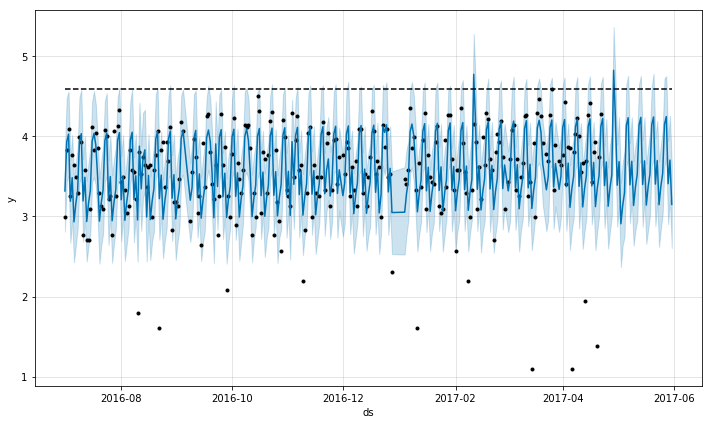

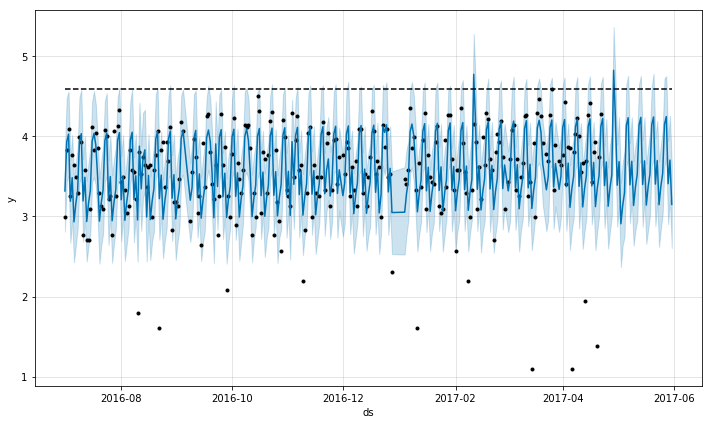

In [54]:
m.plot(forecast)

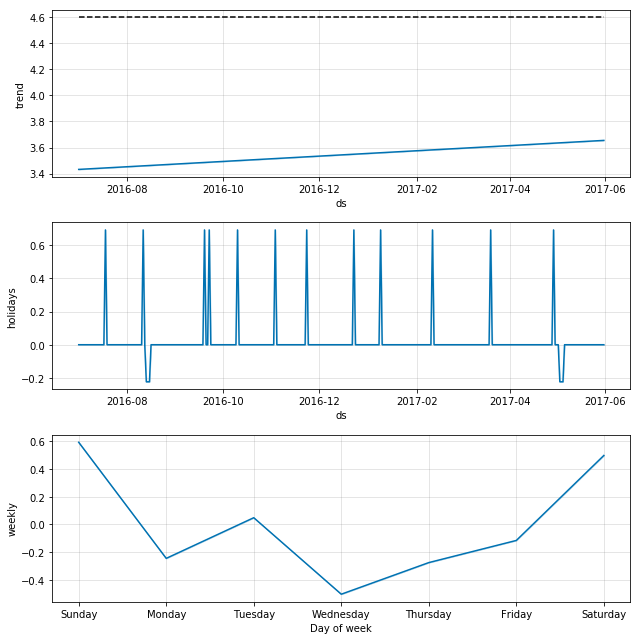

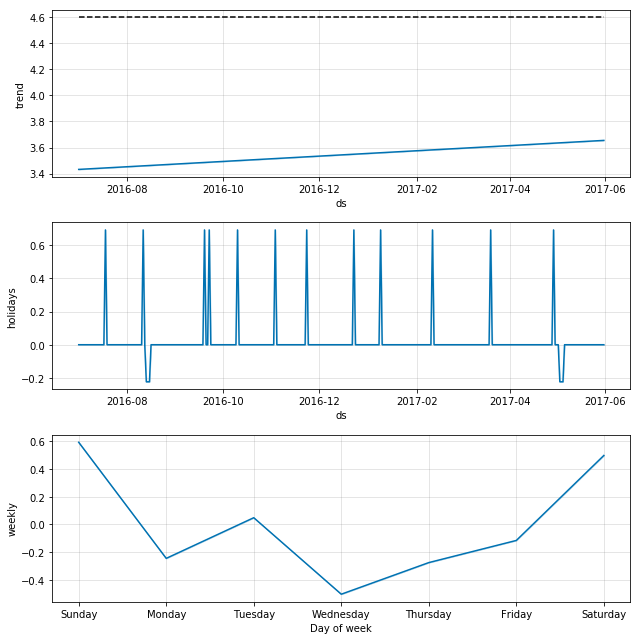

In [55]:
m.plot_components(forecast)

# get valid set

In [41]:
data_raw = pd.read_csv('./data/air_visit_data.csv')
test = pd.read_csv('./data/sample_submission.csv')
test_data = utils.tes2trn(test)
test_stores = test_data.air_store_id.unique()
data = data_raw[data_raw.air_store_id.isin(test_stores)]
tag_data = data.groupby('air_store_id').apply(split)
tag_data = tag_data.set_index('index')
train_set = t[t.type == 0]
valid_set = t[t.type == 1]
len(train_set), len(train_set.air_store_id.unique()), len(valid_set), len(valid_set.air_store_id.unique())

(225049, 821, 25419, 821)

In [31]:
def split(df):
    trn_len = int(np.floor(len(df) * 0.9))
    valid_len = len(df) - trn_len
    df['type'] = 0  #0 for train 1 for valid
    indexs = df.index
    df = df.reset_index()
    df.loc[trn_len:, 'type'] =  1
    return df

In [3]:
data_raw = pd.read_csv('./data/air_visit_data.csv')

(array([ 77154.,  70882.,  46569.,  27859.,  14308.,   8377.,   3760.,
          1574.,    700.,    385.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

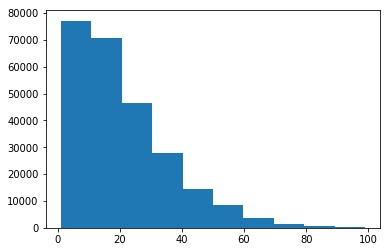

In [5]:
plt.hist(data_raw[data_raw.visitors<100].visitors)